<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Challenge_1_WK_1_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dataset and some useful libraries 

In [ ]:
!pip install keras-tuner

In [2]:
# load the mnist dataset from keras

import tensorflow as tf
from tensorflow import keras
from keras import datasets
import kerastuner as kt
tf.keras.datasets.fashion_mnist.load_data()
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# apply one-hot-encoding to the output data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<ipython-input-2-a085f2bddb81>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


##View the data

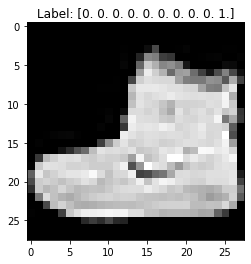

In [3]:
import matplotlib.pyplot as plt

# Select the first image in the training set
image = x_train[0]
label = y_train[0]

# Display the image and its label
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()


#Create, Compile and fit the model and plot the accuracy and loss

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6661 - accuracy: 0.7750 - val_loss: 0.5178 - val_accuracy: 0.8221
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4606 - accuracy: 0.8411 - val_loss: 0.4710 - val_accuracy: 0.8370
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4291 - accuracy: 0.8505 - val_loss: 0.4434 - val_accuracy: 0.8455
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4113 - accuracy: 0.8564 - val_loss: 0.4448 - val_accuracy: 0.8419
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4021 - accuracy: 0.8582 - val_loss: 0.4417 - val_accuracy: 0.8458
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3935 - accuracy: 0.8613 - val_loss: 0.4303 - val_accuracy: 0.8476
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3854 - accuracy: 0.8641 - val_loss: 0.4401 - val_accuracy

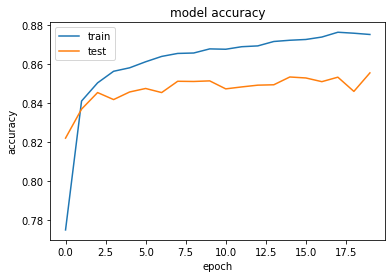

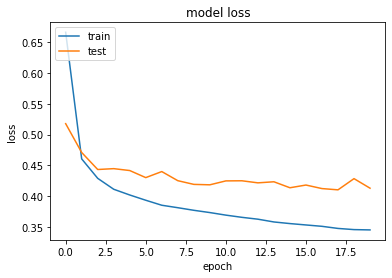

In [4]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Augment the dataset with rotated zoomed, width and height shifts

In [5]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1
     

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


#Create, compile and fit the model with the augmented fashion_mnist data

Epoch 1/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.7210 - accuracy: 0.7381 - val_loss: 0.5072 - val_accuracy: 0.8248
Epoch 2/20
5625/5625 [==============================] - 12s 2ms/step - loss: 0.6063 - accuracy: 0.7815 - val_loss: 0.4949 - val_accuracy: 0.8270
Epoch 3/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.5823 - accuracy: 0.7898 - val_loss: 0.4752 - val_accuracy: 0.8328
Epoch 4/20
5625/5625 [==============================] - 12s 2ms/step - loss: 0.5697 - accuracy: 0.7944 - val_loss: 0.4706 - val_accuracy: 0.8343
Epoch 5/20
5625/5625 [==============================] - 12s 2ms/step - loss: 0.5626 - accuracy: 0.7956 - val_loss: 0.4518 - val_accuracy: 0.8410
Epoch 6/20
5625/5625 [==============================] - 13s 2ms/step - loss: 0.5566 - accuracy: 0.7985 - val_loss: 0.4640 - val_accuracy: 0.8380
Epoch 7/20
5625/5625 [==============================] - 12s 2ms/step - loss: 0.5529 - accuracy: 0.7997 - val_loss: 0.4506 - val_ac

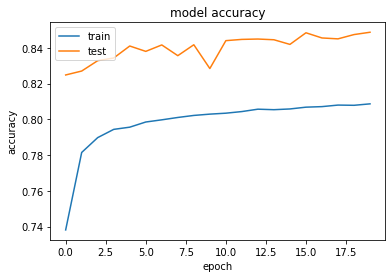

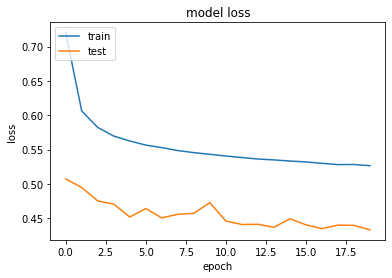

In [6]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Setup the Early Stopping callback

In [7]:
# create the model
model = Sequential() 
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# build the model
def model_builder(hp):
  model = tf.keras.Sequential()
  # specify the input layer separately to the first layer
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Specify a change in the number of units in this layer 
  # from 32 to 512 in steps of 32
  # We have specified the name of this hyperparameter as 'hidden_layer_1_units'
  # this name will appear in the output text when running tuner.search function later on
  hp_units = hp.Int('hidden_layer_1_units', min_value = 32, max_value = 512, step = 32)
  # specify the range of units (hp_units) as the units input parameter to this layer of the model
  model.add(Dense(units=hp_units, activation='relu'))

  hp_units = hp.Int('hidden_layer_2_units', min_value = 64, max_value = 128, step = 32)
  # specify the range of units (hp_units) as the units input parameter to this layer of the model
  model.add(Dense(units=hp_units, activation='relu'))

  # Specify the output layer
  model.add(Dense(units=10, activation='softmax'))

  # set the optimiser in the compile method
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [9]:
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,            # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir', # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt') 
     

In [10]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [16]:
import IPython
# run the hyperparameter search
tuner.search(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 42 Complete [00h 05m 24s]
val_accuracy: 0.8870999813079834

Best val_accuracy So Far: 0.8903999924659729
Total elapsed time: 01h 35m 51s


In [12]:
# print out the hyperparameters keras tuner has determined to be the best values
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'hidden_layer_1_units': 384, 'hidden_layer_2_units': 128, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


In [13]:
# set the model to have the optimum hyperparameters and print the summary so we can see the 
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 384)               301440    
                                                                 
 dense_4 (Dense)             (None, 128)               49280     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 352,010
Trainable params: 352,010
Non-trainable params: 0
_________________________________________________________________


In [14]:

# train the model as usual
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
5625/5625 [==============================] - 41s 7ms/step - loss: 0.5403 - accuracy: 0.7968 - val_loss: 0.3815 - val_accuracy: 0.8614
Epoch 2/10
5625/5625 [==============================] - 40s 7ms/step - loss: 0.4265 - accuracy: 0.8392 - val_loss: 0.3595 - val_accuracy: 0.8710
Epoch 3/10
5625/5625 [==============================] - 39s 7ms/step - loss: 0.3909 - accuracy: 0.8517 - val_loss: 0.3498 - val_accuracy: 0.8714
Epoch 4/10
5625/5625 [==============================] - 41s 7ms/step - loss: 0.3672 - accuracy: 0.8599 - val_loss: 0.3344 - val_accuracy: 0.8788
Epoch 5/10
5625/5625 [==============================] - 39s 7ms/step - loss: 0.3493 - accuracy: 0.8667 - val_loss: 0.3422 - val_accuracy: 0.8792
Epoch 6/10
5625/5625 [==============================] - 40s 7ms/step - loss: 0.3361 - accuracy: 0.8715 - val_loss: 0.3305 - val_accuracy: 0.8817
Epoch 7/10
5625/5625 [==============================] - 41s 7ms/step - loss: 0.3252 - accuracy: 0.8760 - val_loss: 0.3453 - val_ac

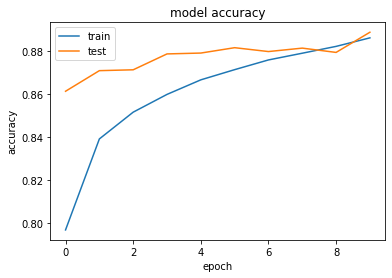

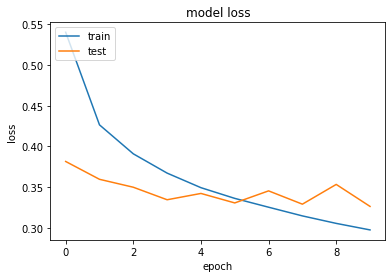

In [15]:
1# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()